In [1]:
# In[1]:


import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord, Distance
#import popsims
import matplotlib.pyplot as plt
from popsims.plot_style import  plot_style
from astropy.coordinates import SkyCoord
import astropy.coordinates as astro_coord
import astropy.units as u
from tqdm import tqdm
from popsims.galaxy import Disk, Halo, GalacticComponent
from popsims import sample_from_powerlaw
import popsims
from gala.units import UnitSystem
import pandas as pd
from scipy.interpolate import interp1d, griddata, InterpolatedUnivariateSpline
from astropy.io.votable import parse_single_table
import numba
plot_style()
import warnings
warnings.filterwarnings("ignore")
import glob
from tqdm import tqdm
#get_ipython().run_line_magic('matplotlib', 'inline')


# In[2]:
from popsims.plot_style import plot_style
plot_style()


path_isochrone='../data/isochrones/'
path_data='../data/images/'
path_streamdata='../data/stream/'
path_pipeline='../data/pipeline/'
path_pandas= '../data/pandas/'

In [2]:
rgc='10_20'
fname=path_isochrone+'/simulated_df_at_M31_normalized_extended_rgc{}.csv'.format(rgc)
df=pd.read_csv(fname)

#put to the desired distance modulus 
mw_df= df.query("galaxy == 'MW'").reset_index(drop=True)
m31_df= df.query("galaxy =='M31'").reset_index(drop=True)

In [2]:
df

NameError: name 'df' is not defined

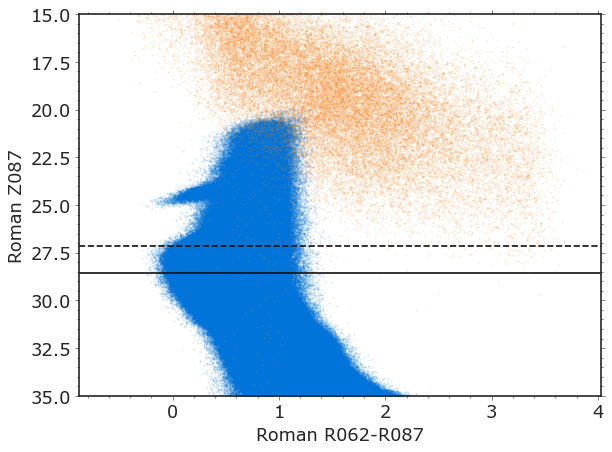

In [3]:
fig, ax=plt.subplots()

#ax.set(title='M31')
#ax.set(title='Milky Way')
p=ax.scatter(m31_df.appF062mag-m31_df.appF087mag, m31_df.appF087mag, s=1, alpha=0.1, c='#0074D9', label='M31 Halo')
ax.invert_yaxis()
ax.set(ylim=[35, 15])


ax.scatter(mw_df.appF062mag-mw_df.appF087mag, mw_df.appF087mag, s=1, alpha=0.1, c='#FF851B', label='Milky Way')
#ax.invert_yaxis()
#ax[1].set(ylim=[35, 15])

#for a in ax:
ax.axhline(28.59, linestyle='-', c='#111111')
ax.axhline(27.15, linestyle='--', c='#111111')
ax.set(xlabel= 'Roman R062-R087', ylabel='Roman Z087')

#plt.tight_layout()
#cax = fig.add_axes([0.08, 0., .3, 0.04])
#plt.colorbar(p, ax=ax, cax=cax, orientation='horizontal')
#cax.set(xlabel=r'[M/H]')
#ax.legend(markerscale=20)
#ax.text()
ax.minorticks_on()
plt.tight_layout()
plt.savefig('../figures/simulated_CMD_Roman_M31.jpeg', bbox_inches='tight')

In [4]:
#check luminosity functions 
fname=path_isochrone+'/simulated_df_at_M31_normalized_extended_rgc{}.csv'.format(rgc)
df=pd.read_csv(fname)

from astropy.io.votable import parse_single_table
path_pandas= '/users/caganze/research/stellarstreams/data/pandas/'
data=parse_single_table(path_pandas+'M31_{}kpc_new.vot'.format(rgc)).to_table().to_pandas()

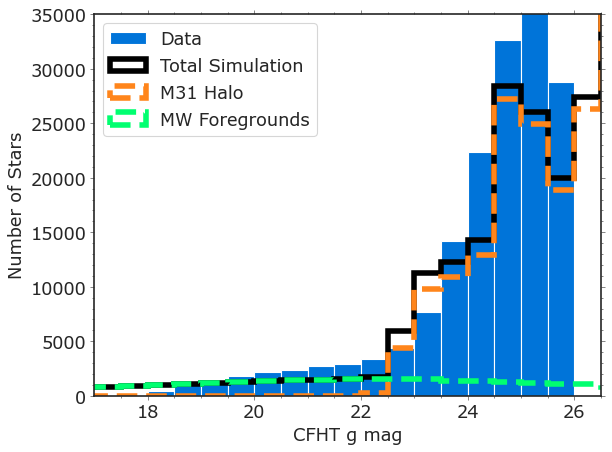

In [5]:
fig, ax=plt.subplots()
_= plt.hist(data.g, bins= np.arange(15, 27, 0.5), log=False, label='Data', color='#0074D9')
_= plt.hist(df.appgmag.values,
            bins= np.arange(15, 30, 0.5), log=False, histtype='step', linewidth=5, \
            label='Total Simulation', linestyle='-', color='k')
_= plt.hist(df.appgmag[df.galaxy.values == 'M31'].values,
            bins= np.arange(15, 30, 0.5), log=False, histtype='step',\
            linestyle='--', linewidth=5, label='M31 Halo', color='#FF851B')

_= plt.hist(df.appgmag[df.galaxy.values == 'MW'].values,
            bins= np.arange(15, 30, 0.5), log=False, histtype='step', linewidth=5, \
            label='MW Foregrounds', linestyle='--', color='#01FF70')


ax.set(xlabel='CFHT g mag', ylabel='Number of Stars', ylim=[0, 35_000], xlim=[17, 26.5])
ax.minorticks_on()
plt.legend()
plt.tight_layout()
plt.savefig('../figures/lf_check_rgc{}.jpeg'.format(rgc), bbox_inches='tight')

In [6]:
'lf_check_rgc{}.pdf'.format(rgc)

'lf_check_rgc10_20.pdf'

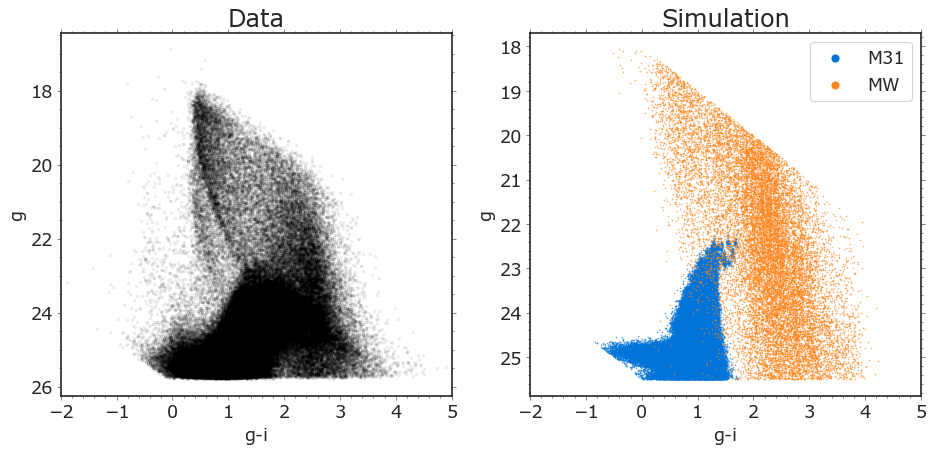

In [7]:
fig, ax=plt.subplots(ncols=2, figsize=(12, 6))
ax[0].scatter(data.g-data.i, data.g, c='k', s=1, marker=',', alpha=0.05)
df0= df[np.logical_and.reduce([df.appgmag.values <25.5, \
                       df.appgmag.values >18,\
                        df.appimag.values >18.,\
                       df.appimag.values < 25.5,
                       (df.galaxy.values == 'M31')]) ]

df1= df[np.logical_and.reduce([df.appgmag.values <25.5, \
                       df.appgmag.values >18,\
                        df.appimag.values >18.,\
                       df.appimag.values < 25.5,
                       (df.galaxy.values == 'MW')]) ]
ax[1].scatter(df0.appgmag-df0.appimag, df0.appgmag, s=.1, label='M31',  color='#0074D9')
ax[1].scatter(df1.appgmag-df1.appimag, df1.appgmag, s=.1, label='MW', color='#FF851B')

#ax[1].vlines()
for a in ax:
    a.invert_yaxis()
    a.set(xlabel='g-i', ylabel='g', xlim=[-2, 5])
    a.minorticks_on()
ax[-1].legend()
ax[-1].legend(markerscale=20)
ax[-1].minorticks_on()
ax[0].set(title='Data')
ax[1].set(title='Simulation')

plt.tight_layout()
plt.savefig('../figures/simulated_CMD_CFHT_rgc{}.jpeg'.format(rgc),  bbox_inches='tight')

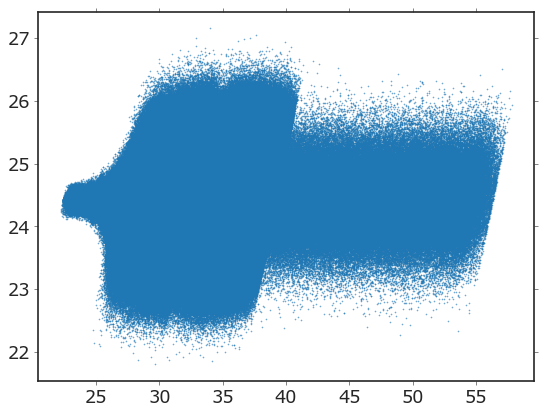

In [8]:
fig, ax=plt.subplots()
#ax.scatter(df.d, df.appgmag-df.gmag, s=.1)
#ax.scatter(mw_df.appF087mag, mw_df.appF087mag-mw_df.F087mag, s=.1)
#ax.scatter(m31_df.appF087mag, m31_df.appF087mag-m31_df.F087mag, s=.1)
ax.scatter(m31_df.appgmag, m31_df.appgmag-m31_df.gmag, s=.1)


#ax.set(ylim=[-10, 30], ylabel='m-M')

In [1]:
fig, ax=plt.subplots()
#ax.scatter(df.d, df.appgmag-df.gmag, s=.1)
#ax.scatter(mw_df.distance, mw_df.appgmag-mw_df.gmag, s=.1)
ax.scatter((m31_df.distance-770_000)/1000, m31_df.appgmag-m31_df.gmag, s=.1, alpha=0.1)
ax.scatter((m31_df.distance-770_000)/1000, m31_df.appF087mag-m31_df.F087mag, s=.1)

#ax.scatter((m31_df.distance-770_000)/1000, m31_df.appgmag-m31_df.gmag, s=.1, alpha=0.1)

ax.set(xlabel='Distance (kpc) -770 kpc', ylabel='m-M')

NameError: name 'plt' is not defined

[Text(0.5, 0, 'Distance (kpc) -770 kpc'), Text(0, 0.5, 'm-M')]

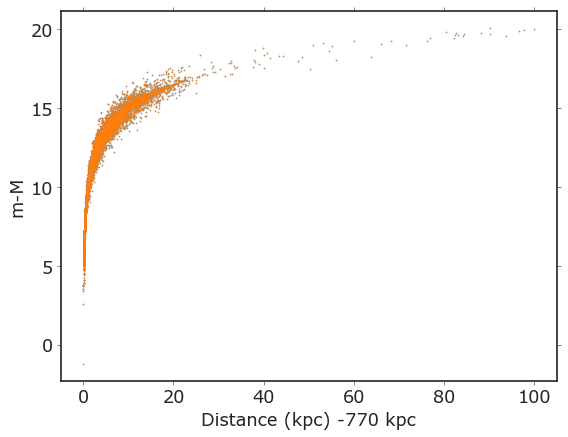

In [10]:
fig, ax=plt.subplots()

ax.scatter((mw_df.distance)/1000, mw_df.appgmag-mw_df.gmag, s=.1, alpha=1)
#ax.scatter((m31_df.distance-770_000)/1000, m31_df.appF087mag-m31_df.F087mag, s=.1)

ax.scatter((mw_df.distance)/1000, mw_df.appgmag-mw_df.gmag, s=.1, alpha=1)

ax.set(xlabel='Distance (kpc) -770 kpc', ylabel='m-M')

[Text(0.5, 0, 'gmag'), Text(0, 0.5, 'gmag error')]

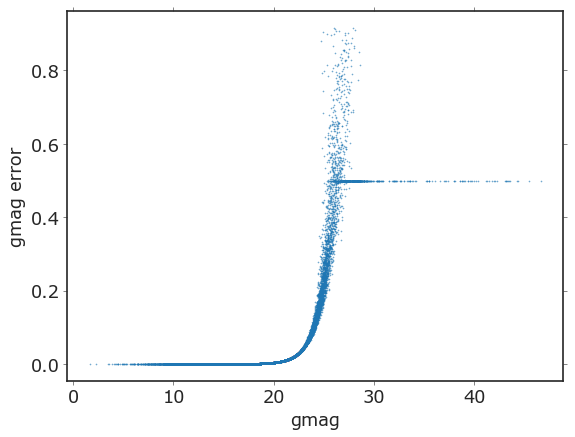

In [11]:
fig, ax=plt.subplots()

ax.scatter( mw_df.appimag, mw_df.appimag_er, s=.1, alpha=1)
#ax.scatter( m31_df.appgmag, m31_df.appgmag_er, s=.1, alpha=1)

ax.set(xlabel='gmag', ylabel='gmag error')

In [12]:
df.columns

Index(['Unnamed: 0', 'F062mag', 'F087mag', 'gmag', 'imag', 'logAge', 'MH',
       'Mini', 'distance', 'appgmag', 'appgmag_er', 'appimag', 'appimag_er',
       'appF062mag', 'appF062mag_er', 'appF087mag', 'appF087mag_er', 'g-i',
       'galaxy'],
      dtype='object')

In [13]:
data --> presumbaly we're su

SyntaxError: invalid syntax (535876387.py, line 1)

In [ ]:
fig, ax=plt.subplots()
for i in range(0, 10000):
    x=np.random.normal([2, 2], [10, 0.1])
    ax.axvline(x[0]/10+x[1], c='k', alpha=0.1)
    

In [ ]:
x.flatten().sum()